In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv(r"C:\Users\HP\Desktop\projects\fashion mnist\fashion-mnist_train.csv")
test=pd.read_csv(r"C:\Users\HP\Desktop\projects\fashion mnist\fashion-mnist_test.csv")

In [5]:
x_train=train.drop("label",axis=1)
y_train=train["label"]

In [6]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [8]:
x_test=test.drop("label",axis=1)
y_test=test["label"]

In [9]:
classes=["top","trouser","pullover","dress","coat","sandel","shirt","sneaker","bag","ankel boot"]

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train.shape
x_test.shape

(10000, 784)

In [12]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train=x_train.reshape(60000,28,28)
x_test=x_test.reshape(10000,28,28)

In [15]:
x_train.shape
x_test.shape

(10000, 28, 28)

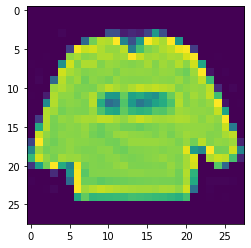

In [16]:
plt.imshow(x_train[0])

In [17]:
classes[y_train[0]]

'pullover'

In [18]:
model= keras.Sequential([
    #cnn
    keras.layers.Conv1D(34,kernel_size=3,input_shape=(28,28),activation="relu"),
    keras.layers.MaxPool1D(),
    keras.layers.Conv1D(44,kernel_size=3,input_shape=(28,28),activation="relu"),
    keras.layers.MaxPool1D(),
    #ann
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(150,activation="relu"),
    keras.layers.Dropout(.30),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(.30),
    keras.layers.Dense(50,activation="relu"),
    
    keras.layers.Dense(10,activation="sigmoid")
    
])
model.compile(optimizer= "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6395 - accuracy: 0.7645
Epoch 2/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4362 - accuracy: 0.8427
Epoch 3/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3911 - accuracy: 0.8582
Epoch 4/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3670 - accuracy: 0.8682
Epoch 5/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3431 - accuracy: 0.8767
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3297 - accuracy: 0.8802
Epoch 7/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3176 - accuracy: 0.8853
Epoch 8/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3091 - accuracy: 0.8889
Epoch 9/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2974 - accuracy: 0.8913
Epoch 10/50
1875/1875 [==============================] - 14s 8ms/step - l

In [20]:
y_prediction=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [21]:
from tensorflow.math import confusion_matrix

In [22]:
y_test.shape

(10000,)

In [23]:
y_prediction=[np.argmax(i) for i in y_prediction]


In [24]:
cm = confusion_matrix(y_test,y_prediction)

In [27]:
import seaborn as sm

In [34]:
y_prediction[:5]

[0, 1, 2, 2, 3]

<AxesSubplot:xlabel='predicted', ylabel='truth'>

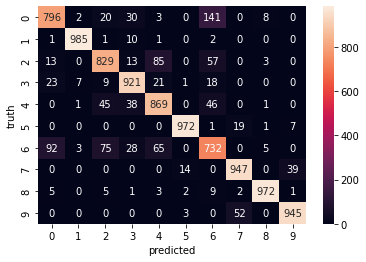

In [38]:
plt.Figure(figsize=(10,7))
mapp= sm.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("truth")
mapp

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.83      0.84      1000
           3       0.88      0.92      0.90      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.73      0.73      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.97      0.98      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

